In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
df=pd.read_csv(r"C:\Users\yuva\Downloads\amazon_laptop_price_dataset.csv")

In [373]:
df

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_USD
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,1092.04
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,1934.84
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,758.86
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,1430.88
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,1457.77
...,...,...,...,...,...,...,...,...
995,Dell,Intel i5,8,1024,Windows 10,NVIDIA GTX 1650,3.7,1700.53
996,Apple,AMD Ryzen 5,8,256,Windows 10,NVIDIA GTX 1650,3.1,1534.86
997,Apple,AMD Ryzen 5,32,512,Windows 10,Integrated,3.6,2101.13
998,Dell,AMD Ryzen 5,32,128,Windows 11,Integrated,3.3,1289.01


In [374]:
df["Price"] = (df["Price_USD"] * 90.94).round().astype(int)
df.drop(columns=["Price_USD"], inplace=True)

In [375]:
df.head(2)

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,99310
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,175954


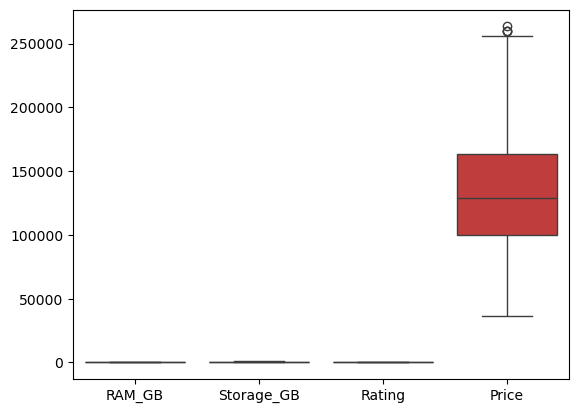

In [376]:
sns.boxplot(data=df)
plt.show()

In [377]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Price"] < lower_bound) | 
              (df["Price"] > upper_bound)]

outliers

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
101,Apple,Intel i7,16,1024,macOS,NVIDIA RTX 3050,4.1,260056
598,Apple,Intel i7,32,1024,macOS,Integrated,4.5,263440
617,Apple,AMD Ryzen 7,32,1024,macOS,Integrated,5.0,260106
865,HP,Intel i7,32,1024,macOS,NVIDIA RTX 3050,3.1,259960


In [379]:
df = df.drop(index=[101, 598, 617, 865, 345], errors="ignore")
df.head(600)

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,99310
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,175954
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69011
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,130124
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,132570
...,...,...,...,...,...,...,...,...
597,Acer,AMD Ryzen 7,8,256,macOS,Integrated,4.2,112118
599,Acer,Intel i7,16,512,macOS,AMD Radeon,3.8,153077
600,Dell,Intel i7,32,512,macOS,Integrated,4.6,174941
601,Acer,Intel i7,8,256,macOS,NVIDIA GTX 1650,4.8,136668


In [392]:
df["GPU"].replace({"Integrated":0,"AMD Radeon":1,"NVIDIA RTX 3050":2,"NVIDIA GTX 1650":3},inplace=True)
df["GPU"]

C:\Users\yuva\AppData\Local\Temp\ipykernel_12864\3301616604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GPU"].replace({"Integrated":0,"AMD Radeon":1,"NVIDIA RTX 3050":2,"NVIDIA GTX 1650":3},inplace=True)
C:\Users\yuva\AppData\Local\Temp\ipykernel_12864\3301616604.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

0      1
1      3
2      0
3      1
4      2
      ..
995    3
996    3
997    0
998    0
999    0
Name: GPU, Length: 995, dtype: int64

In [391]:
df["Operating_System"].replace({"Windows 11": 0,"Windows 10": 1,"macOS": 2},inplace=True)
df["Operating_System"]

0      2
1      2
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Operating_System, Length: 995, dtype: int64

In [386]:
df['Processor'].replace({'Intel i3': 1, 'Intel i5': 2, 'Intel i7': 3,'AMD Ryzen 3': 1, 'AMD Ryzen 5': 2, 'AMD Ryzen 7': 3},inplace=True)
df["Processor"]

C:\Users\yuva\AppData\Local\Temp\ipykernel_12864\1272532691.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Processor'].replace({'Intel i3': 1, 'Intel i5': 2, 'Intel i7': 3,'AMD Ryzen 3': 1, 'AMD Ryzen 5': 2, 'AMD Ryzen 7': 3},inplace=True)


0      1
1      3
2      3
3      3
4      3
      ..
995    2
996    2
997    2
998    2
999    1
Name: Processor, Length: 995, dtype: int64

In [393]:
# check value count of operating system column
df['Operating_System'].value_counts()

Operating_System
0    345
1    326
2    324
Name: count, dtype: int64

In [394]:
# check the processor column value counts
df['Processor'].value_counts()

Processor
2    349
3    338
1    308
Name: count, dtype: int64

In [395]:
# brand column encoding using one hot encoding

from sklearn.preprocessing import OneHotEncoder

# Load the one hot models
encoder = OneHotEncoder(sparse_output=False)

# fit and transform the brand column
brand_encoded = encoder.fit_transform(df[["Brand"]])
brand_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [396]:
# brand_encoded add in the dataframe

result = pd.DataFrame(
    brand_encoded, 
    columns=encoder.get_feature_names_out(["Brand"]))

result

,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,1.0,0.0,0.0,0.0
991,0.0,1.0,0.0,0.0,0.0,0.0,0.0
992,0.0,1.0,0.0,0.0,0.0,0.0,0.0
993,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [398]:
data=pd.concat([df,res],axis=1)
data.drop(columns="Brand",axis=1,inplace=True)
data = data.drop(index=[101, 598, 617, 865, 345], errors="ignore")
data.head(102)

,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI
0,1.0,4.0,512.0,2.0,1.0,4.2,99310.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,32.0,128.0,2.0,3.0,3.1,175954.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,8.0,256.0,1.0,0.0,3.6,69011.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,16.0,512.0,0.0,1.0,3.6,130124.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,8.0,512.0,0.0,2.0,3.8,132570.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.0,32.0,1024.0,0.0,3.0,4.2,221443.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98,3.0,16.0,512.0,2.0,2.0,4.5,164366.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,1.0,8.0,512.0,0.0,2.0,4.4,123378.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,1.0,8.0,1024.0,1.0,3.0,4.5,127767.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


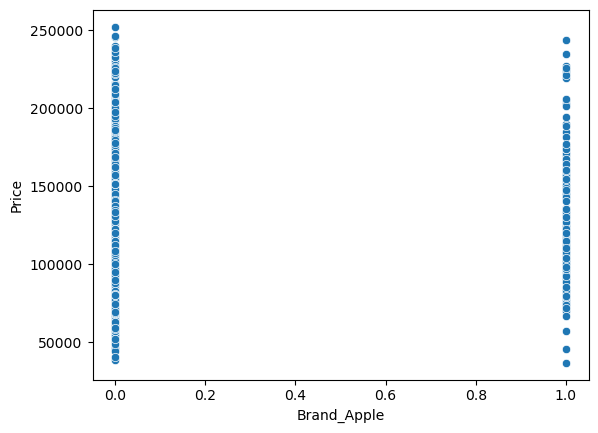

In [399]:
sns.scatterplot(x=data["Brand_Apple"],y=df["Price"])
plt.show()

In [400]:
#Feature Engineering

x=data.drop(columns="Price",axis=1)
y=data["Price"]
x=x.fillna(0)
y=y.fillna(0)

In [401]:
x.shape

(995, 13)

In [402]:
y.shape

(995,)

In [403]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [404]:
# Import model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [405]:
output=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
output

,Actual,Predicted
925,90083.0,107080.318978
527,181560.0,190965.005352
569,109607.0,102920.633940
661,125047.0,127893.100325
637,128350.0,134303.833076
...,...,...
488,110844.0,102500.986282
453,136008.0,105971.159106
65,86075.0,82120.254229
142,89853.0,97820.796945


In [406]:
# Check model loss function

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error: ",mae)

Mean Squared Error:  14746.236119655481


In [407]:
# Check model Evaluation matrix using R-squared score

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-Squared Score: ",r2)

R-Squared Score:  0.8107109940040385


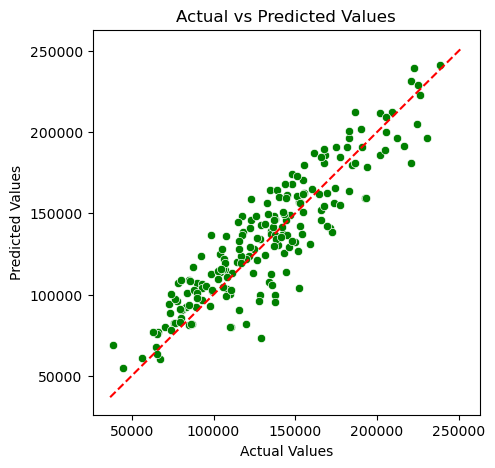

In [408]:
# Display the fit line for test data

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Add a reference line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
 

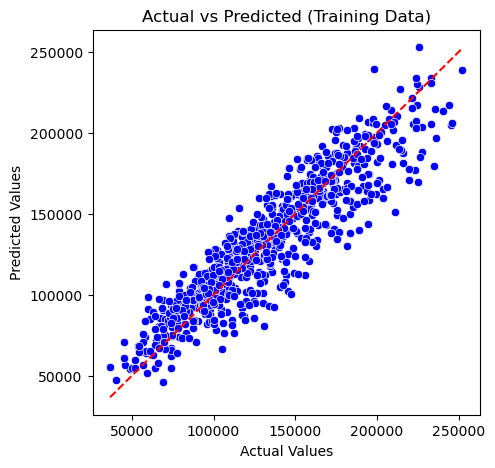

In [409]:
# Display the fit line on training data

y_train_pred = model.predict(x_train)
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_train, y=y_train_pred, color='blue')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

plt.title("Actual vs Predicted (Training Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()